# Import

In [22]:
from _data_import_and_cleaning import *

In [23]:
df.head()

,customer_id,first_payment_date,channel,payment_month,first_payment_month,payment_method_id,total_transactions,total_volume,fixed_rate,variable_rate,fixed_rate_comission,variable_rate_comission,total_comission
0,5568.0,2020-03-03,2.0,2020-03-01,2020-03-01,3.0,2.0,112.17,0.29,0.0,0.58,0.0,0.58
1,5568.0,2020-03-03,2.0,2020-04-01,2020-03-01,3.0,3.0,236.86,0.29,0.0,0.87,0.0,0.87
2,5568.0,2020-03-03,2.0,2020-05-01,2020-03-01,3.0,2.0,100.13,0.29,0.0,0.58,0.0,0.58
3,5568.0,2020-03-03,2.0,2020-06-01,2020-03-01,3.0,4.0,20.88,0.29,0.0,1.16,0.0,1.16
4,6763.0,2020-03-05,2.0,2020-03-01,2020-03-01,3.0,4.0,48.40,0.29,0.0,1.16,0.0,1.16


In [24]:
for x in [df_org, df_methods, df_payments]:
    display(x.head())

,customer_id,first_payment_date,channel
0,5568,2020-03-03,2
1,6763,2020-03-05,2
2,6816,2020-06-04,2
3,22350,2020-03-24,2
4,40800,2020-01-27,2


,payment_method_id,fixed_rate,variable_rate
0,3,0.29,0.000
1,11,0.25,0.018
2,17,0.39,0.000
3,19,0.25,0.000


,customer_id,payment_month,payment_method_id,total_transactions,total_volume
0,3120659,2020-01-01,3,241,2543.28
1,3627499,2020-01-01,3,430,27037.00
2,3611429,2020-01-01,3,117,6100.00
3,3772639,2020-01-01,3,27,720.56
4,3789659,2020-01-01,3,15,440.35


# Research

## Overall dynamics

,n_customers,sum_payments,sum_volume,sum_fixed_rate_comission,sum_variable_rate_comission,sum_total_comission
payment_month,,,,,,
2020-01-01,1738,24168.0,2410356.45,7204.72,2053.85598,9258.57598
2020-02-01,3281,66904.0,4751002.63,19872.28,6583.29804,26455.57804
2020-03-01,5271,139256.0,10904156.10,42815.90,12543.00030,55358.90030
2020-04-01,6929,198562.0,16599164.20,60838.10,17002.62090,77840.72090
2020-05-01,8520,277676.0,26407231.53,83529.70,35922.61440,119452.31440
2020-06-01,10098,299268.0,29016640.73,90392.00,43138.46952,133530.46952


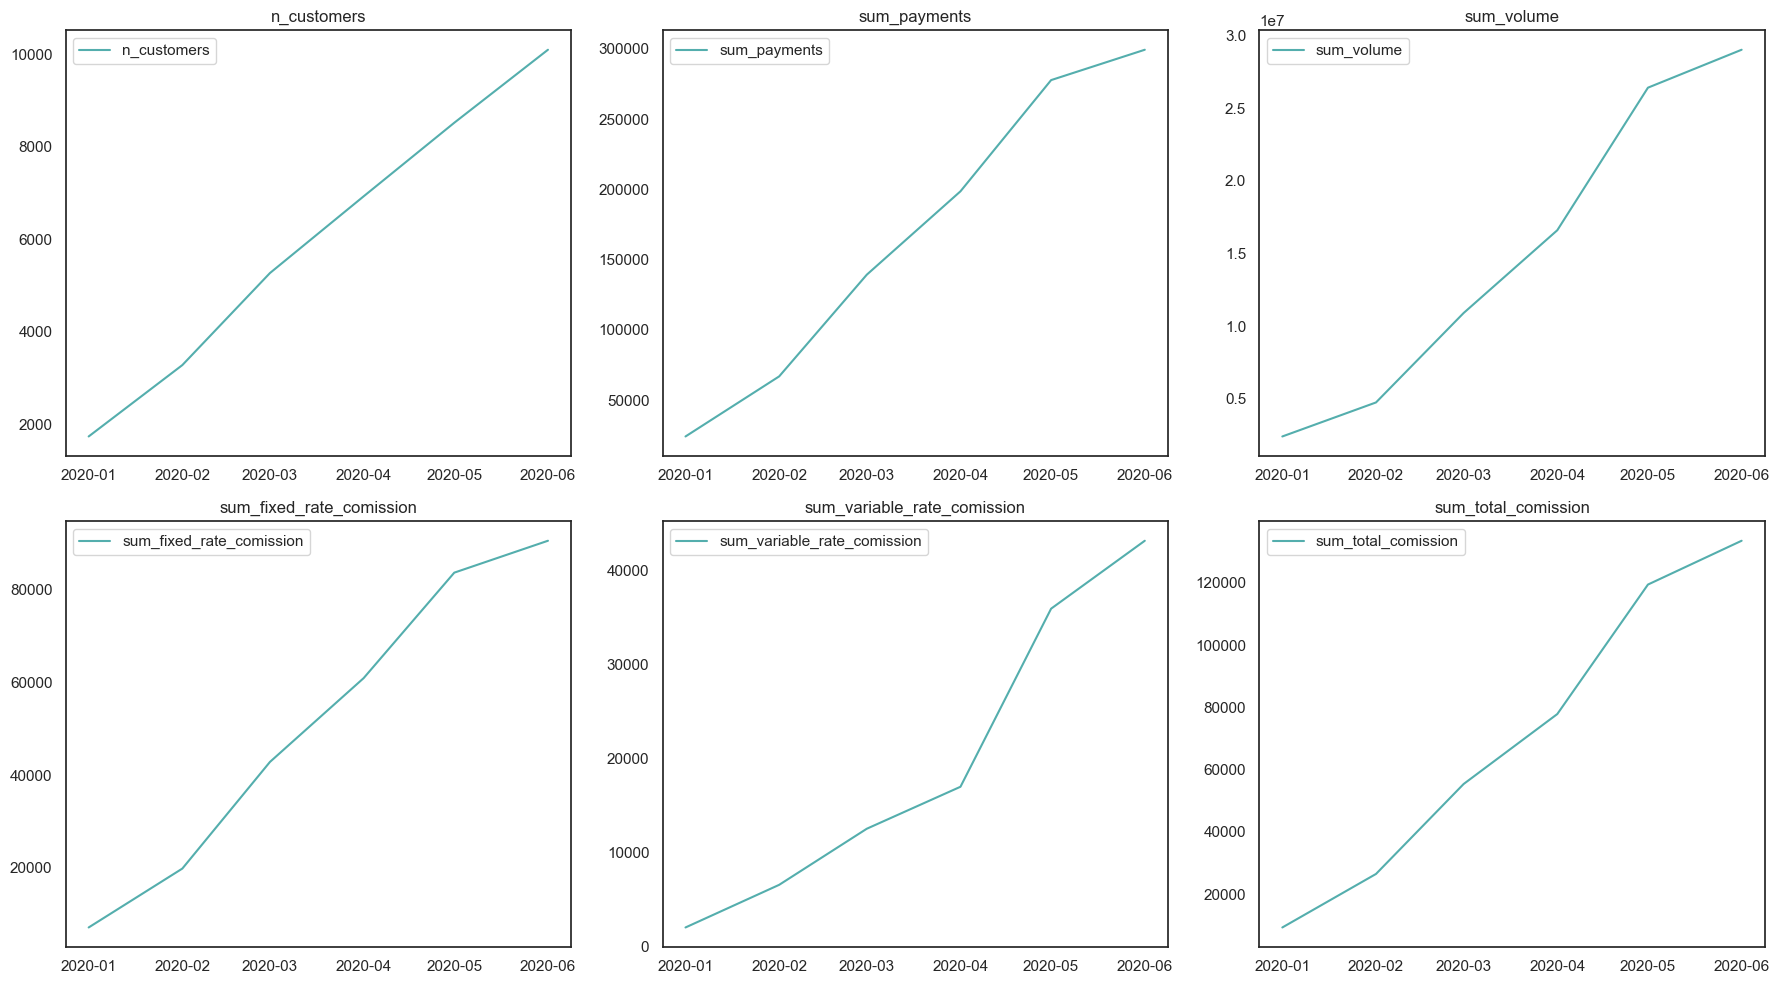

In [25]:
_df = (
    df
    .groupby('payment_month')
    .agg(
        n_customers=('customer_id', 'nunique'),
        sum_payments=('total_transactions', 'sum'),
        sum_volume=('total_volume', 'sum'),
        sum_fixed_rate_comission=('fixed_rate_comission', 'sum'),
        sum_variable_rate_comission=('variable_rate_comission', 'sum'),
        sum_total_comission=('total_comission', 'sum')
    )
)

display(_df)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, column in enumerate(_df.columns):
    axes[i].plot(_df.index, _df[column], label=column)
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [26]:
# Very linear, though it is said that the data was fabricated...

## Customers
Ok, there is linear growth of the number of the customers. But are they all the same quality?

,n_months,sum_total_comission,comission_per_month
count,10098.000000,10098.000000,10098.000000
mean,3.548921,41.780210,11.714415
std,1.684902,499.828146,115.539349
min,1.000000,0.000000,0.000000
25%,2.000000,0.580000,0.217500
50%,4.000000,2.030000,0.676667
75%,5.000000,11.020000,3.190000
max,6.000000,33861.230000,6772.246000


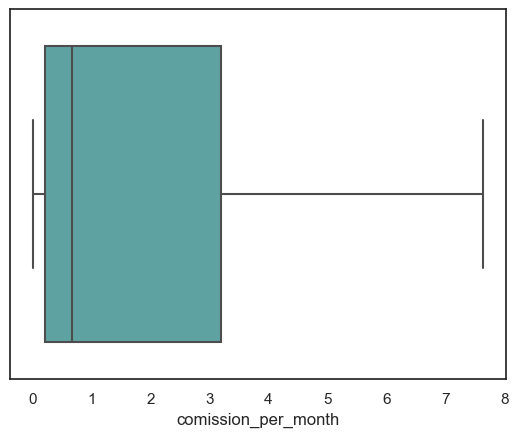

In [27]:
_df = (
    df
    .groupby('customer_id')
    .agg(
        n_months=('payment_month', 'nunique'),
        sum_total_comission=('total_comission', 'sum')
    )
    .assign(
        comission_per_month=lambda x: x.sum_total_comission / x.n_months
    )
)

sns.boxplot(data=_df, x='comission_per_month', showfliers=False, orient='h')

_df.describe()

In [28]:
total_per_month = df['total_comission'].sum() / df['payment_month'].nunique()

# Shares for every customer to see their avg role
_df['comission_per_month_share'] = _df['comission_per_month'] / total_per_month * 100

_df['comission_per_month_share'].describe()

count    10098.000000
mean         0.016660
std          0.164314
min          0.000000
25%          0.000309
50%          0.000962
75%          0.004537
max          9.631147
Name: comission_per_month_share, dtype: float64

In [29]:
_df.columns

Index(['n_months', 'sum_total_comission', 'comission_per_month',
       'comission_per_month_share'],
      dtype='object')

In [30]:
# Let's keep this share as the feature for the future customer segmentation

df_customer_contribution = (
    _df
    .reset_index()
    .copy()
)
df_customer_contribution.head()

,customer_id,n_months,sum_total_comission,comission_per_month,comission_per_month_share
0,5568.0,4,3.1900,0.7975,0.001134
1,6763.0,4,1.4500,0.3625,0.000516
2,6816.0,1,0.2900,0.2900,0.000412
3,22350.0,4,0.8700,0.2175,0.000309
4,40800.0,6,435.7536,72.6256,0.103284


In [31]:
df_customer_contribution.to_csv('./datasets/organizations_contribution.csv', index=False)

## Rate types and their role

In [32]:
# Comparing fixed and variable rate comissions
(
    df
    .agg(
        sum_fixed_rate_comission=('fixed_rate_comission', 'sum'),
        sum_variable_rate_comission=('variable_rate_comission', 'sum')
    )
    .fillna(0)
    .assign(val=lambda x: x.fixed_rate_comission + x.variable_rate_comission)
    .drop(columns=['fixed_rate_comission', 'variable_rate_comission'])
    .T
    .assign(total=lambda x: x.sum_fixed_rate_comission + x.sum_variable_rate_comission)
    .assign(
        share_of_fixed_rate_comission=lambda x: x.sum_fixed_rate_comission / x.total * 100,
        share_of_variable_rate_comission=lambda x: x.sum_variable_rate_comission / x.total * 100
    )
    .T
)

,val
sum_fixed_rate_comission,304652.700000
sum_variable_rate_comission,117243.859140
total,421896.559140
share_of_fixed_rate_comission,72.210283
share_of_variable_rate_comission,27.789717


In [33]:
# Was it the same for every month in the given period?

_df = (
    df
    .groupby('payment_month')
    .agg(
        sum_fixed_rate_comission=('fixed_rate_comission', 'sum'),
        sum_variable_rate_comission=('variable_rate_comission', 'sum'),
        sum_total_comission=('total_comission', 'sum')
    )
    .assign(
        share_of_fixed_rate_comission=lambda x: x.sum_fixed_rate_comission / x.sum_total_comission * 100,
        share_of_variable_rate_comission=lambda x: x.sum_variable_rate_comission / x.sum_total_comission * 100
    )
    .sort_index()
)

display(_df[['share_of_fixed_rate_comission', 'share_of_variable_rate_comission']])
_df.share_of_fixed_rate_comission.std(), _df.share_of_fixed_rate_comission.mean()

,share_of_fixed_rate_comission,share_of_variable_rate_comission
payment_month,,
2020-01-01,77.816718,22.183282
2020-02-01,75.115652,24.884348
2020-03-01,77.342396,22.657604
2020-04-01,78.157164,21.842836
2020-05-01,69.927234,30.072766
2020-06-01,67.693913,32.306087


(4.470285769751688, 74.34217976578121)

In [34]:
# Yes, it is a stable number.

## Payment methods

In [35]:
# Checking what is the most commonly-used payment method and what brings more revenue
total_transactions = df['total_transactions'].sum()
total_comission = df['total_comission'].sum()

(
    df
    .groupby('payment_method_id')
    .agg(
        sum_total_comission=('total_comission', 'sum'),
        sum_transactions=('total_transactions', 'sum')
    )
    .assign(
        share_of_transactions=lambda x: x.sum_transactions / total_transactions * 100,
        share_of_comission=lambda x: x.sum_total_comission / total_comission * 100
    )
    .sort_values('share_of_comission', ascending=False)
)

,sum_total_comission,sum_transactions,share_of_transactions,share_of_comission
payment_method_id,,,,
3.0,227183.97000,783393.0,77.884919,53.848263
11.0,131409.60914,56663.0,5.633435,31.147353
17.0,60891.48000,156132.0,15.522641,14.432798
19.0,2411.50000,9646.0,0.959005,0.571586


count    3319.000000
mean       39.593133
std       224.123282
min         0.250180
25%         1.780630
50%         5.760240
75%        20.514440
max      7125.791880
Name: total_comission, dtype: float64

,total_comission,share_of_comission
34354,7125.79188,1.688990
34351,6251.07026,1.481659
26763,3807.74940,0.902532
39350,3313.00136,0.785264
39349,2739.60920,0.649356
18903,2521.10620,0.597565
25504,1892.86600,0.448656
36613,1870.04100,0.443246
37180,1807.26200,0.428366
8911,1496.48274,0.354704


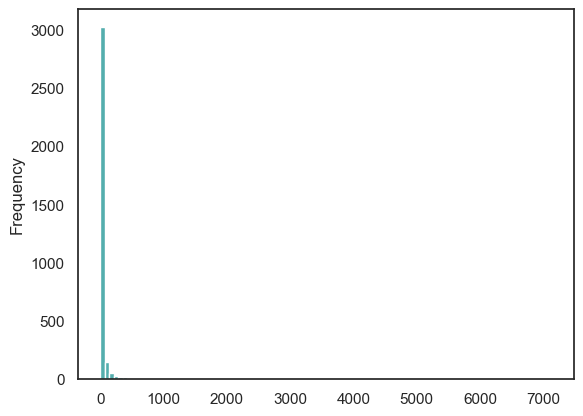

In [36]:
# Is there any specific customer or small group of customers 
# that skews the results for payment method 11?
(
    df
    [df.payment_method_id == 11]
    ['total_comission']
    .plot(kind='hist', x='total_comission', bins=100)
)
display(
    df
    [df.payment_method_id == 11]
    ['total_comission']
    .describe()
)

_total = df['total_comission'].sum()

_df = (
    df
    [df.payment_method_id == 11]
    .assign(
        share_of_comission=lambda x: x.total_comission / _total * 100
    )
)

_df[['total_comission', 'share_of_comission']].sort_values('total_comission', ascending=False).head(20)

In [37]:
# I need to check everything about this payment method in a separate notebook

## Channels

In [38]:
df.channel.unique()

array([2., 1.])

In [39]:
# What is the core acqusition channel?

_total_comission = df['total_comission'].sum()
_total_transactions = df['total_transactions'].sum()
_total_customers = df['customer_id'].nunique()

(
    df
    .groupby('channel')
    .agg(
        sum_total_comission=('total_comission', 'sum'),
        sum_transactions=('total_transactions', 'sum'),
        n_customers=('customer_id', 'nunique')
    )
    .assign(
        share_of_comission=lambda x: x.sum_total_comission / _total_comission * 100,
        share_of_transactions=lambda x: x.sum_transactions / _total_transactions * 100,
        share_of_customers=lambda x: x.n_customers / _total_customers * 100
    )
    .T
)

channel,1.0,2.0
sum_total_comission,167160.865040,254735.694100
sum_transactions,377850.000000,627984.000000
n_customers,163.000000,9935.000000
share_of_comission,39.621291,60.378709
share_of_transactions,37.565841,62.434159
share_of_customers,1.614181,98.385819


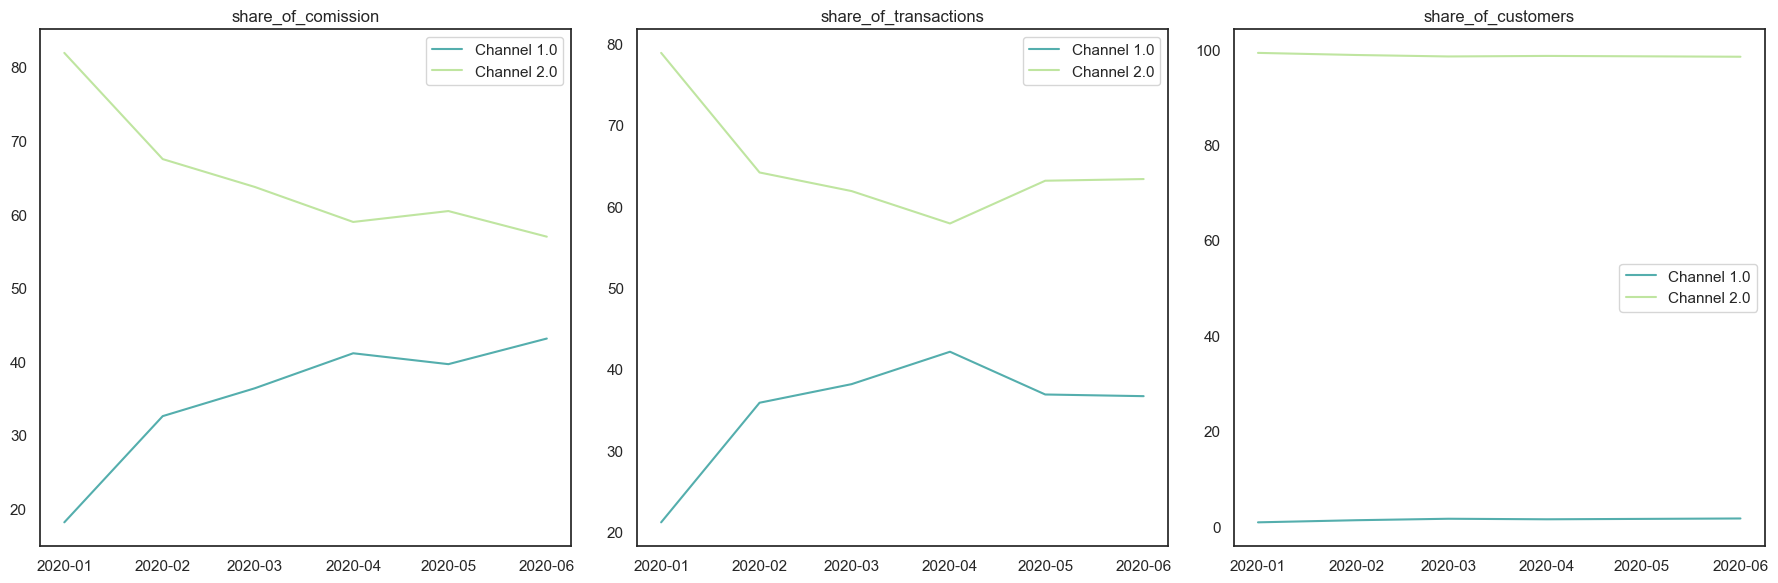

In [40]:
# How this looks in dynamics?
_df = (
    df
    .groupby(['payment_month', 'channel'])
    .agg(
        sum_total_comission=('total_comission', 'sum'),
        sum_transactions=('total_transactions', 'sum'),
        n_customers=('customer_id', 'nunique')
    )
    .reset_index()
)

_monthly_totals = (
    _df
    .groupby('payment_month')
    .agg(
        total_comission=('sum_total_comission', 'sum'),
        total_transactions=('sum_transactions', 'sum'),
        total_customers=('n_customers', 'sum')
    )
)

_df = _df.merge(_monthly_totals, on='payment_month')

_df = _df.assign(
    share_of_comission=lambda x: x.sum_total_comission / x.total_comission * 100,
    share_of_transactions=lambda x: x.sum_transactions / x.total_transactions * 100,
    share_of_customers=lambda x: x.n_customers / x.total_customers * 100
)


_df =_df.set_index(['payment_month', 'channel'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Loop over each column and channel to plot the dynamics
for i, column in enumerate([x for x in _df.columns if 'share_' in x]):
    for channel in _df.index.get_level_values('channel').unique():
        channel_data = _df.xs(channel, level='channel')
        axes[i].plot(channel_data.index, channel_data[column], label=f"Channel {channel}")
    
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [41]:
# For the first channel, the share of commissions grows while the share of transactions stays stable. 
# And there was something specific in the first month. So I need to check this information in detail, 
# as well as what happened in the first month.

In [42]:
# Ok, roughly, comapring spendings on channels and the revenue. When I will check the
# channels data in details, I will define the acquisition window to attribute the revenue 
# properly by their acquisition date.

_n_months = df.payment_month.nunique()

(
    df
    .groupby('channel')
    .agg(
        sum_total_comission=('total_comission', 'sum'),
        sum_transactions=('total_transactions', 'sum'),
        n_customers=('customer_id', 'nunique')
    )
    .assign(
        acquisition_cost = 10000 * _n_months,
        cost_per_revenue = lambda x: x.acquisition_cost / x.sum_total_comission,
        cost_per_transaction = lambda x: x.acquisition_cost / x.sum_transactions,
        customer_acquisition_cost = lambda x: x.acquisition_cost / x.n_customers
    )
    .T
)

channel,1.0,2.0
sum_total_comission,167160.865040,254735.694100
sum_transactions,377850.000000,627984.000000
n_customers,163.000000,9935.000000
acquisition_cost,60000.000000,60000.000000
cost_per_revenue,0.358936,0.235538
cost_per_transaction,0.158793,0.095544
customer_acquisition_cost,368.098160,6.039255


## Cohorts
Let's separate users into cohorts by acquisition month and check how dynamics changes for them in time.

In [43]:
# Calculating user average acquisition cost and assigning it to the actual users uniformly as
# we don't have actual user-level data
monthly_acquisition_cost = 10000

df_acc_costs = (
    df_org
    .assign(
        first_payment_month=lambda x: x.first_payment_date.dt.to_period('M').dt.to_timestamp()
    )
    .groupby(['first_payment_month', 'channel'])
    .agg(
        n_customers=('customer_id', 'nunique')
    )
    .assign(
        avg_acquisition_cost=lambda x: monthly_acquisition_cost / x.n_customers
    )
    .reset_index()
)

display(df_acc_costs)

df_channels_data_per_month = (
    df
    .assign(
        month_difference=lambda x: (x['payment_month'].dt.to_period('M') - x['first_payment_month'].dt.to_period('M'))
    )
    .assign(
        month_difference=lambda x: x['month_difference'].apply(lambda y: y.n)
    )
    .groupby(['first_payment_month', 'channel', 'payment_month', 'month_difference'])
    .agg(
        n_customers=('customer_id', 'nunique'),
        total_transactions=('total_transactions', 'sum'),
        total_volume=('total_volume', 'sum'),
        total_comission=('total_comission', 'sum')
    )
    # .reset_index()
    # .groupby(['first_payment_month', 'channel'])
    # .agg(
    #     cumsum_total_comission=('total_comission', 'cumsum'),
    # )
)

df_channels_data_per_month = df_channels_data_per_month.reset_index()

_cumsums = df_channels_data_per_month.groupby(['first_payment_month', 'channel'])['total_comission'].cumsum()

_cumsums.name = 'cumsum_total_comission'


df_channels_data_per_month = (
    df_channels_data_per_month
    .merge(_cumsums, left_index=True, right_index=True)
    .assign(
        cost_return_rate=lambda x: x.cumsum_total_comission / monthly_acquisition_cost
    )
)

df_channels_data_per_month.head()

,first_payment_month,channel,n_customers,avg_acquisition_cost
0,2020-01-01,1,14,714.285714
1,2020-01-01,2,1724,5.800464
2,2020-02-01,1,27,370.370370
3,2020-02-01,2,1516,6.596306
4,2020-03-01,1,41,243.902439
5,2020-03-01,2,1949,5.130836
6,2020-04-01,1,18,555.555556
7,2020-04-01,2,1640,6.097561
8,2020-05-01,1,30,333.333333
9,2020-05-01,2,1561,6.406150


,first_payment_month,channel,payment_month,month_difference,n_customers,total_transactions,total_volume,total_comission,cumsum_total_comission,cost_return_rate
0,2020-01-01,1.0,2020-01-01,0,14,5109.0,212559.16,1674.23084,1674.23084,0.167423
1,2020-01-01,1.0,2020-02-01,1,14,12508.0,545242.48,4589.44882,6263.67966,0.626368
2,2020-01-01,1.0,2020-03-01,2,14,15806.0,728946.34,5990.04742,12253.72708,1.225373
3,2020-01-01,1.0,2020-04-01,3,14,15398.0,732059.29,5848.91334,18102.64042,1.810264
4,2020-01-01,1.0,2020-05-01,4,14,19181.0,1520314.26,9381.48482,27484.12524,2.748413


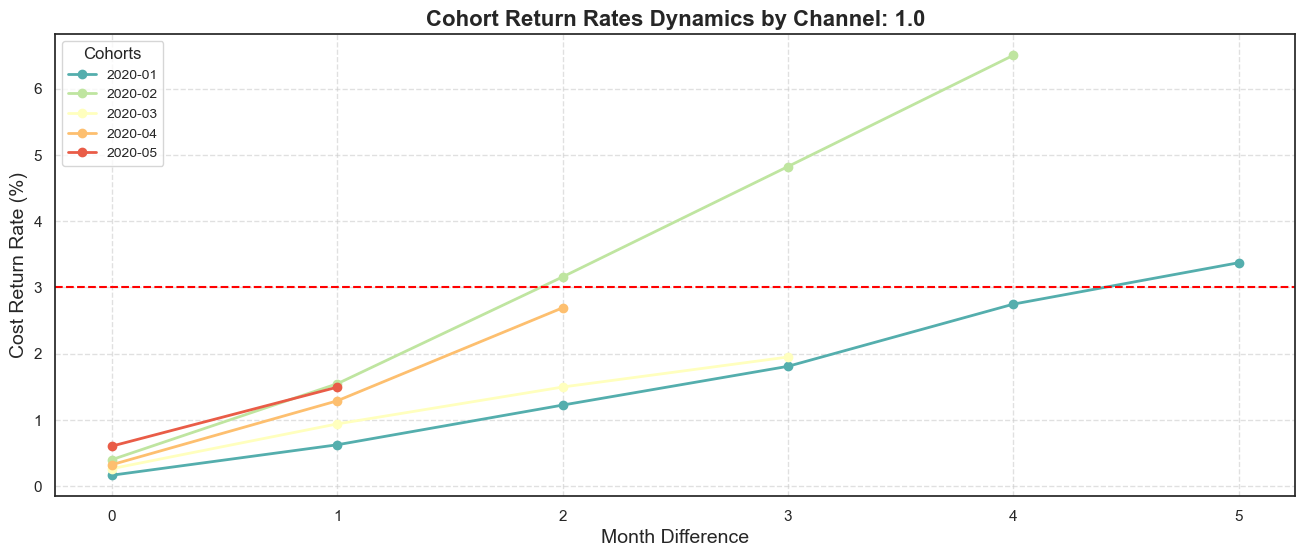

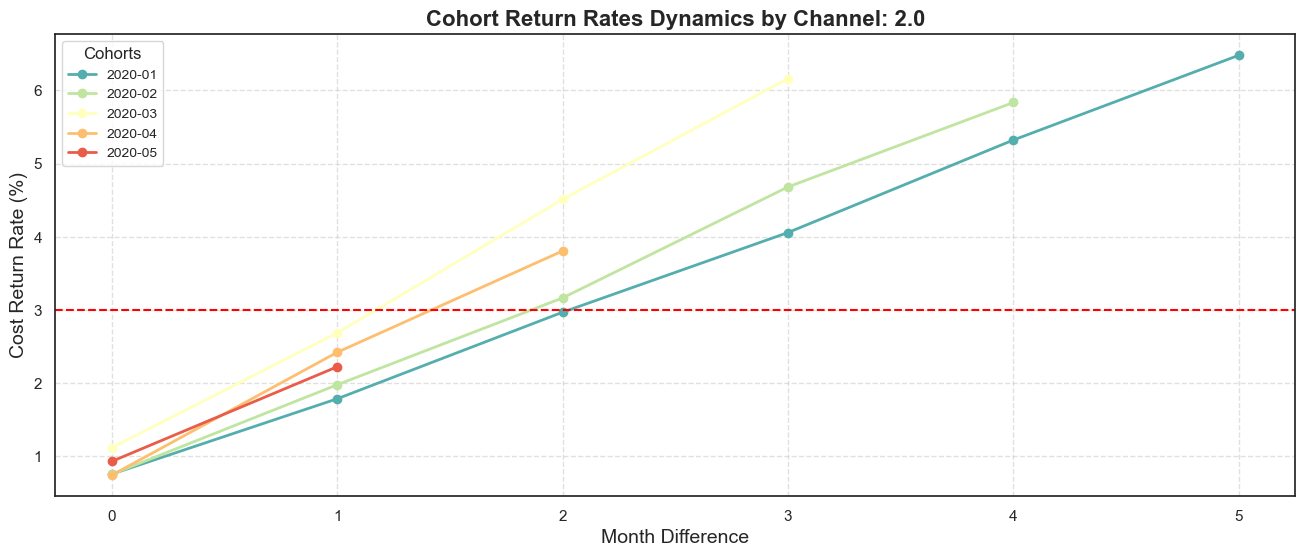

In [92]:

# Let's visualize cohort return rates dynamics by channels

for channel, _df in df_channels_data_per_month.groupby('channel'):
    plt.figure(figsize=(16,6))
    ax = plt.gca()

    valid_cohorts = [
        cohort for cohort, _d in _df.groupby('first_payment_month')
        if _d['month_difference'].max() >= 1
    ]

    for cohort in valid_cohorts:
        _d = _df[_df['first_payment_month'] == cohort]
        ax.plot(
            _d.month_difference, 
            _d.cost_return_rate, 
            label=cohort.strftime('%Y-%m'),  
            linestyle='-', 
            marker='o',
            markersize=6,
            linewidth=2
        )

    ax.set_title(f'Cohort Return Rates Dynamics by Channel: {channel}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Month Difference', fontsize=14)
    ax.set_ylabel('Cost Return Rate (%)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Cohorts', loc='upper left', fontsize=10, title_fontsize=12)
    ax.axhline(y=3, color='red', linestyle='--', linewidth=1.5, label='Rate = 3')
    # plt.tight_layout()
    plt.show()



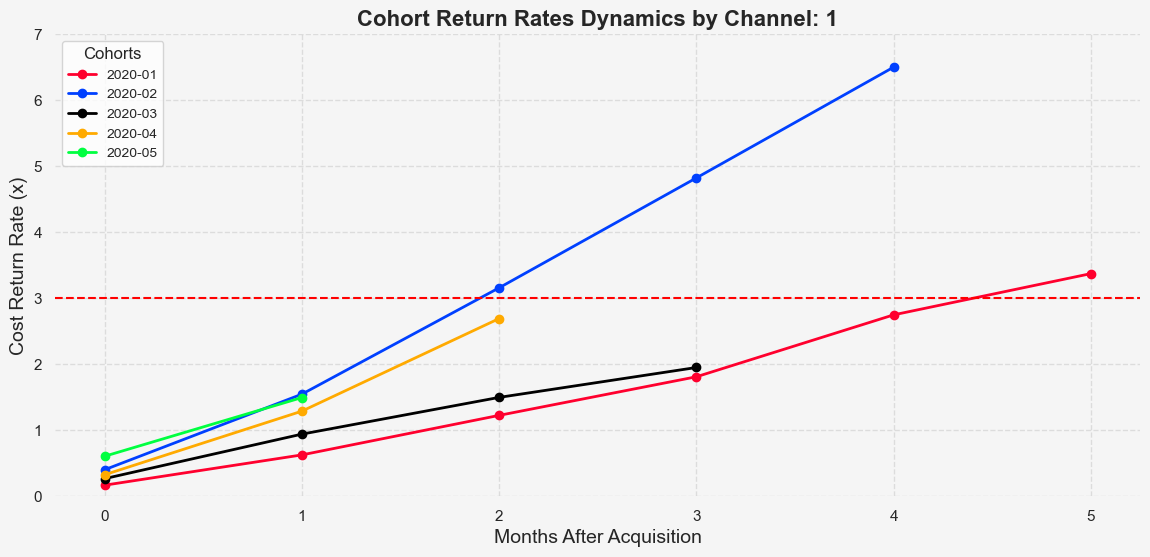

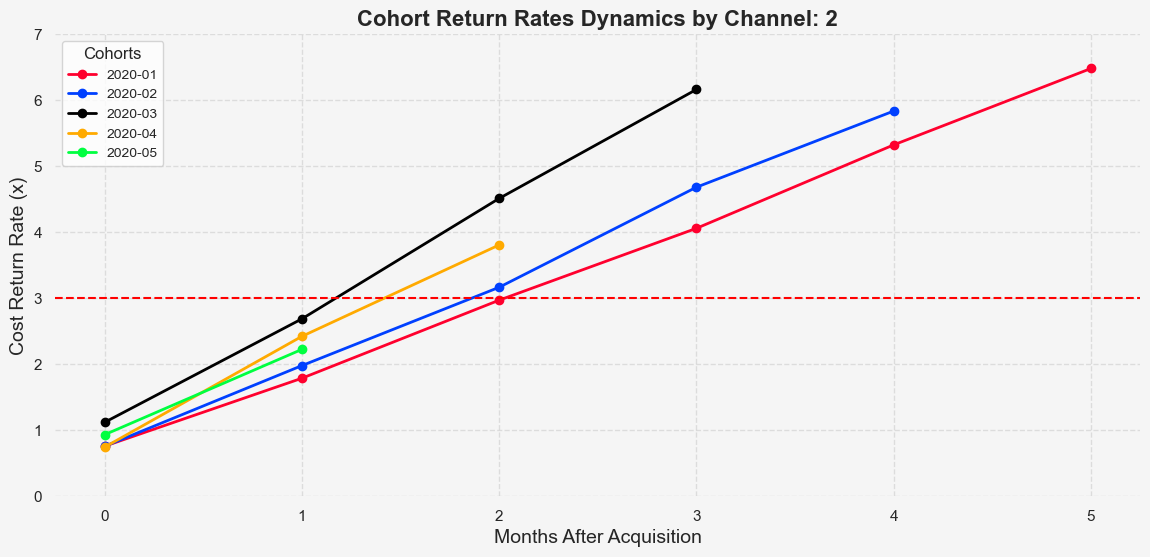

In [53]:
# Visualisation for PPT

colors = ['#FF002E', '#0040FF', '#000000', '#FFAA00', '#00FF40', '#FF00F0', '#00FFFF']
global_min = df_channels_data_per_month['cost_return_rate'].min()
global_max = df_channels_data_per_month['cost_return_rate'].max()
y_step = 1
y_min = np.floor(global_min)
y_max = np.ceil(global_max)

for i, (channel, _df) in enumerate(df_channels_data_per_month.groupby('channel')):
    plt.figure(figsize=(14,6), facecolor='#F5F5F5')
    ax = plt.gca()

    ax.set_facecolor('#F5F5F5')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    valid_cohorts = [
        cohort for cohort, _d in _df.groupby('first_payment_month')
        if _d['month_difference'].max() >= 1
    ]

    for j, cohort in enumerate(valid_cohorts):
        _d = _df[_df['first_payment_month'] == cohort]
        ax.plot(
            _d.month_difference, 
            _d.cost_return_rate, 
            label=cohort.strftime('%Y-%m'),  
            color=colors[j % len(colors)],
            linestyle='-', 
            marker='o',
            markersize=6,
            linewidth=2
        )

    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))
    ax.set_title(f'Cohort Return Rates Dynamics by Channel: {str(channel).replace(".0","")}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Months After Acquisition', fontsize=14)
    ax.set_ylabel('Cost Return Rate (x)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Cohorts', loc='upper left', fontsize=10, title_fontsize=12)
    ax.axhline(y=3, color='red', linestyle='--', linewidth=1.5, label='Rate = 3')

    plt.show()


## Customers without payments

In [19]:

# What is the percentage of missed cases
_missed_cases = df_org[~df_org.customer_id.isin(df_payments.customer_id)]

print(f"Percentage of missed cases: {round(len(_missed_cases) / len(df_org) * 100, 2)}%")

print("Distribution of missed cases by channel:")
display(
    _missed_cases.groupby('channel')
    .agg(
        n_customers=('customer_id', 'nunique')
    )
    .assign(
        share=lambda x: round(x.n_customers / _missed_cases.customer_id.nunique()*100, 2)
    )
    .reset_index()
    .merge(
        df_org.groupby('channel').agg(
            total_channel_n_customers=('customer_id', 'nunique')
        ),
        on='channel'
    )
    .assign(
        share_of_channel=lambda x: round(x.n_customers / x.total_channel_n_customers * 100, 2)
    )
    
)

Percentage of missed cases: 2.25%
Distribution of missed cases by channel:


,channel,n_customers,share,total_channel_n_customers,share_of_channel
0,1,3,1.32,163,1.84
1,2,224,98.68,9935,2.25


In [146]:
# Cases that were not missed, but have gaps
_blinking_cases = (
    df
    .groupby(['customer_id', 'payment_month'])
    .agg(
        total_volume=('total_volume','sum')
    )
    .reset_index()
    .sort_values('payment_month')
    .assign(previous_month_total_volume=lambda x: x.groupby('customer_id')['total_volume'].shift(1))
    .pipe(
        lambda x: x[
            ~x.payment_month.isin([x.payment_month.max(),x.payment_month.min()])
            & (x.previous_month_total_volume == 0)
            & ~x.customer_id.isin(_missed_cases.customer_id)
        ]
    )
)

print(f"Percentage of blinking cases: {round(_blinking_cases.customer_id.nunique() / len(df_org) * 100, 2)}%")

print("Distribution of blinking cases by channel:")
display(
    df_org
    [df_org.customer_id.isin(_blinking_cases.customer_id)]
    .groupby('channel')
    .agg(
        n_customers=('customer_id', 'nunique')
    )
    .assign(
        share=lambda x: round(x.n_customers / _blinking_cases.customer_id.nunique()*100, 2)
    )
    .merge(
        df_org.groupby('channel').agg(
            total_channel_n_customers=('customer_id', 'nunique')
        ),
        on='channel'
    )
    .assign(
        share_of_channel=lambda x: round(x.n_customers / x.total_channel_n_customers * 100, 2)
    )
    .reset_index()
)

Percentage of blinking cases: 23.72%
Distribution of blinking cases by channel:


,channel,n_customers,share,total_channel_n_customers,share_of_channel
0,1,10,0.42,163,6.13
1,2,2385,99.58,9935,24.01
